# **Codig Dojo**: Visualization Video Games
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-01-23
- Fecha de modificación: 2022-01-23
- Descripción: Nintendo Switch hardware and software units sold

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 120

In [127]:
df = pd.read_excel('games-data.xls')

Es una base corta pero interesante para practicar extracción de texto con expresiones regulares.

In [128]:
df

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60,378,385,521
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120,594,688,811
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76,379,455,534
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18,154,169,237
4,Nintendo Switch software/Japan,ten thousand units (software),89,1226,2148,3256
5,Nintendo Switch software/The Americas,ten thousand units (software),286,2752,5394,7428
6,Nintendo Switch software/Europe,ten thousand units (software),142,1917,3516,5017
7,Nintendo Switch software/Other,ten thousand units (software),29,456,797,1171


In [129]:
df[['platform', 'region']] = df.iloc[:,0].str.split('/', expand=True)

In [130]:
# \( y \) son los caracteres que busco
# (.+) extrae de forma greedy lo que esté dentro de esos parentesis

df['type'] = df.Metric.str.extract(r'\((.+)\)')


In [131]:
# elimino columnas que no necesito
df = df.iloc[:,2:]

In [132]:
df

,3/2017,3/2018,3/2019,3/2020,platform,region,type
0,60,378,385,521,Nintendo Switch hardware,Japan,hardware
1,120,594,688,811,Nintendo Switch hardware,The Americas,hardware
2,76,379,455,534,Nintendo Switch hardware,Europe,hardware
3,18,154,169,237,Nintendo Switch hardware,Other,hardware
4,89,1226,2148,3256,Nintendo Switch software,Japan,software
5,286,2752,5394,7428,Nintendo Switch software,The Americas,software
6,142,1917,3516,5017,Nintendo Switch software,Europe,software
7,29,456,797,1171,Nintendo Switch software,Other,software


In [133]:
df = df.melt(id_vars=df.columns[-3:], var_name='year', value_name='units')
df['year'] = df.year.str.extract(r'\/(.+)').astype(int)
# df.units = df.units*10000


In [231]:
df1 = df.pivot_table(index=['region','year'], columns=['type'], aggfunc={'units':np.sum})
df1 = df1.droplevel(0,axis=1)
df1 = df1.rename_axis(None, axis=1).reset_index()
df1['games per console'] = df1.software/df1.hardware
df1.columns = [i.title() for i in df1.columns]
df1 = df1.melt(id_vars=['Region','Year'],var_name='Type', value_name='Sales')
df1['LogSales'] = np.log(df1.Sales)
df1

,Region,Year,Type,Sales,LogSales
0,Europe,2017,Hardware,76.000000,4.330733
1,Europe,2018,Hardware,379.000000,5.937536
2,Europe,2019,Hardware,455.000000,6.120297
3,Europe,2020,Hardware,534.000000,6.280396
4,Japan,2017,Hardware,60.000000,4.094345
5,Japan,2018,Hardware,378.000000,5.934894
6,Japan,2019,Hardware,385.000000,5.953243
7,Japan,2020,Hardware,521.000000,6.255750
8,Other,2017,Hardware,18.000000,2.890372
9,Other,2018,Hardware,154.000000,5.036953


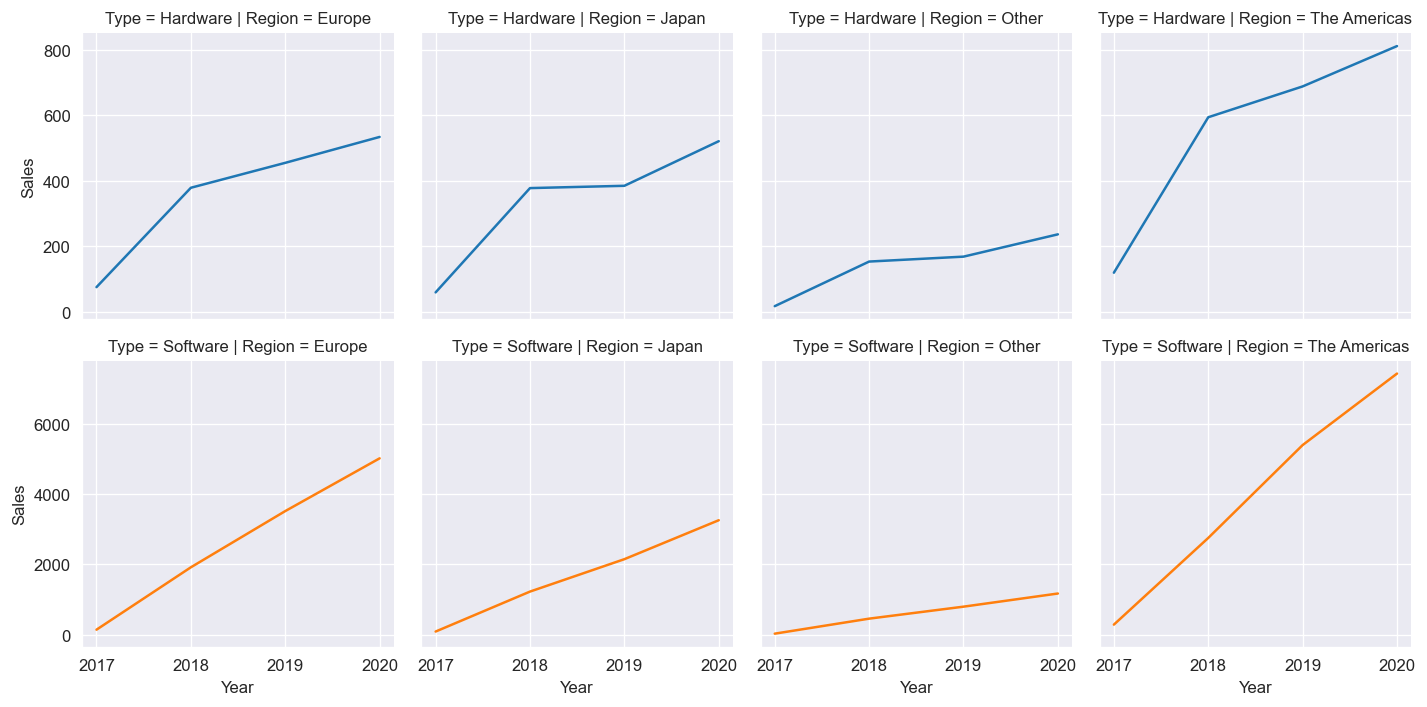

In [283]:
sns.set_palette('tab10')
g = sns.FacetGrid(data=df1[df1.Type.isin(['Hardware','Software'])], col="Region", row='Type', hue='Type', sharex=True, sharey='row')
g.map(sns.lineplot, 'Year', 'Sales')
plt.show()

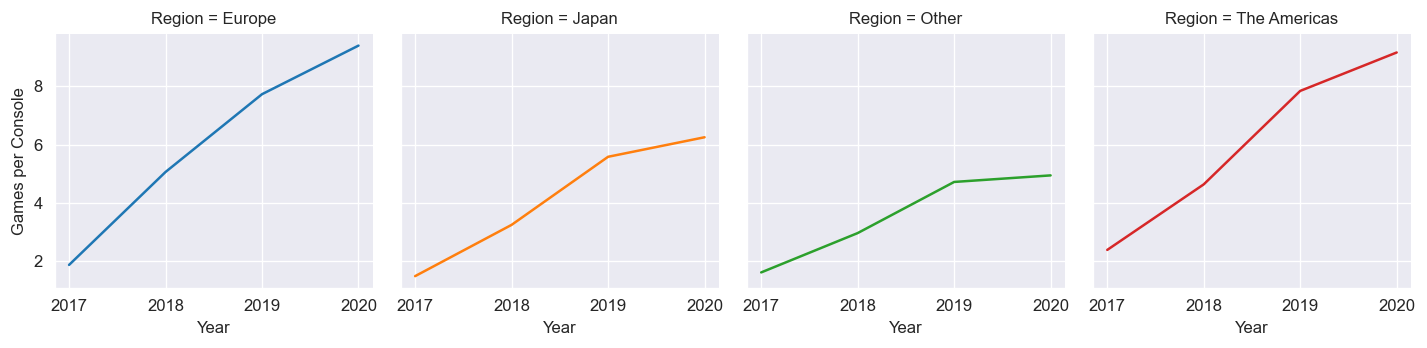

In [284]:
sns.set_palette('tab10')
g = sns.FacetGrid(data=df1[df1.Type.isin(['Games Per Console'])], col="Region", hue='Region', sharex=True, sharey='row')
g.map(sns.lineplot, 'Year', 'Sales')
g.set_ylabels('Games per Console')
plt.show()

La mayor cantidad de videojuegos por consola se vende en Europa y América